# **Credit Card Fraud Detection using Neural Networks**

Colab Link: https://colab.research.google.com/drive/1DInbAADnFGG67V8LXP5gp8ha2PggzfMC?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

**---> Reading the dataset**

In [ ]:
# Dataset : https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
data = pd.read_csv('datasheet.csv')

data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


**---> Cleaning Data**

In [ ]:
# Drop Unnamed: 0 as we have an autogenerated ID column for each row

data = data.drop(labels=['Unnamed: 0'], axis=1)
data = data.drop([0])

**---> Removing all the null values (if any)**



In [ ]:
data.isnull().sum() 

# No null values in any column

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [ ]:
data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
columns_X = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23']

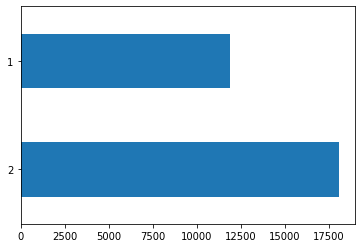

In [ ]:
# X2: SEX
data['X2'].value_counts().plot(kind='barh')
# No. of Females > No. of Males

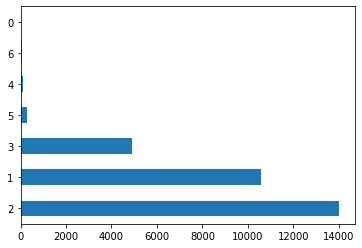

In [ ]:
# X3: EDUCATION
data['X3'].value_counts().plot(kind='barh')

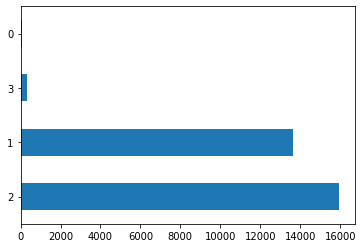

In [ ]:
# X4: MARRIAGE
data['X4'].value_counts().plot(kind='barh')

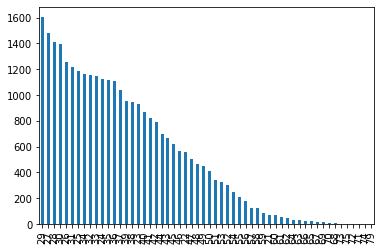

In [ ]:
# data['X5']
data['X5'].value_counts().plot(kind="bar")

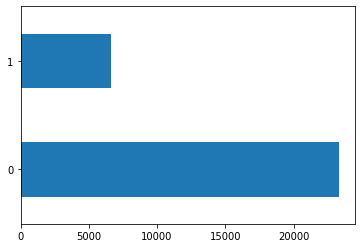

In [ ]:
# Y: Classification
data['Y'].value_counts().plot(kind='barh')

**---> Reshaping the Dataset**


In [ ]:
# Dividing Dataset into Features and Output
X = pd.DataFrame(data, columns=columns_X)
print("Shape of X -> ", X.shape)

# Setting Up Output
Y = data.Y
Y = Y.values.reshape(Y.shape[0],1)
print("Shape of Y -> ", Y.shape)

Shape of X ->  (30000, 23)
Shape of Y ->  (30000, 1)


**---> Scaling Data**

In [ ]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))

**---> Dividing Data into Train, Validation and Test**

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

**---> Implementing KFold**

In [ ]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
def KFold_func(model, name):
  results = []
  names = []
  kfold = KFold(n_splits=5, random_state=1)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

**---> Using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
# model1 = LogisticRegression(random_state=2)
# model1 = LogisticRegression(random_state=2, class_weight='balanced')
# logit = model1.fit(X_train, np.array(y_train))
# model1.fit(X_train, np.array(y_train))

*  Hyper Parameter Tuning for Logistic Regression

In [ ]:
lr_class_weight = ['None', 'balanced']
lr_max_iters = [1, 10, 100, 200]
lr_tolerance = [0.0002, 0.0001]
final_model_lr = LogisticRegression(random_state=2)
acc = -1
for w in lr_class_weight:
  for iter in lr_max_iters:
    for rho in lr_tolerance:
      model1 = LogisticRegression(random_state=2, class_weight=(w), max_iter=int(iter), tol=(rho))
      model1.fit(X_train, np.array(y_train))
      y_pred_val = model1.predict(X_val)
      if metrics.accuracy_score(y_val, y_pred_val) > acc:
        acc = metrics.accuracy_score(y_val, y_pred_val)
        final_model_lr = model1
        print(acc)
final_model_lr

0.7760416666666666
0.795625
0.8091666666666667


LogisticRegression(C=1.0, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0002, verbose=0,
                   warm_start=False)

In [ ]:
# y_pred_logit = model1.predict(X_test)
KFold_func(final_model_lr, 'Logistic Regression')
y_pred_logit = final_model_lr.predict(X_test)
# y_pred_logit

Logistic Regression: 0.809115 (0.005571)


In [ ]:
print("Accuracy LR:",metrics.accuracy_score(y_test, y_pred_logit))
print("Precision LR:",metrics.precision_score(y_test, y_pred_logit, pos_label="0"))
print("Recall LR:",metrics.recall_score(y_test, y_pred_logit, pos_label="0"))
print("F1 Score LR:",metrics.f1_score(y_test, y_pred_logit, pos_label="0"))

Accuracy LR: 0.8103333333333333
Precision LR: 0.8179537717254972
Recall LR: 0.9739705568593984
F1 Score LR: 0.8891702376314765


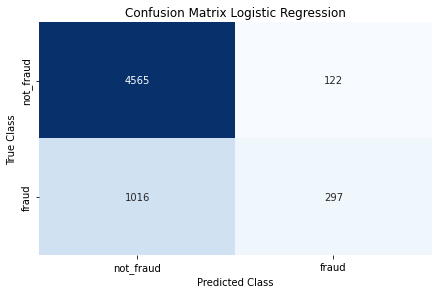

In [ ]:
matrix_logit = confusion_matrix(y_test, y_pred_logit)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logistic Regression"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

**---> Using Single Perceptron (Threshold Function)**

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
# model3.decision_function(X_test)
# y_train
# y_train[0][0]


# a = []
# b= np.array(['1'])
# c = np.array(['0'])

# for i in range(len(y_train)):
#   if y_train[i][0] == '0':
#     a.append(b)
#   else:
#     a.append(c)
# np.asarray(a)
# model0 = Perceptron(tol=1e-3, random_state=0)
# sp1 = model0.fit(X_train, a)
# model0.decision_function(X_test)

*  Hyper Parameter Tuning for Perceptron

In [ ]:
sp_max_iters = [1, 10, 100]
sp_tolerance = [0.004, 0.003, 0.002, 0.001]
final_model_sp = Perceptron(tol=1e-3, random_state=0)
acc = -1
for iter in sp_max_iters:
  for rho in sp_tolerance:
    model2 = Perceptron(tol=(rho), random_state=0, max_iter=int(iter))
    model2.fit(X_train, np.array(y_train))
    sp_y_pred_val = model2.predict(X_val)
    if metrics.accuracy_score(y_val, sp_y_pred_val) > acc:
      acc = metrics.accuracy_score(y_val, sp_y_pred_val)
      # print(acc)
      final_model_sp = model2
final_model_sp

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=10, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.004,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# sp = final_model_sp.fit(X_train, y_train)
KFold_func(final_model_sp, 'Single Perceptron')
y_pred_sp = final_model_sp.predict(X_test)

Single Perceptron: 0.615729 (0.210895)


In [ ]:
print("Accuracy SP:",metrics.accuracy_score(y_test, y_pred_sp))
print("Precision SP:",metrics.precision_score(y_test, y_pred_sp, pos_label="0"))
print("Recall SP:",metrics.recall_score(y_test, y_pred_sp, pos_label="0"))
print("F1 Score SP:",metrics.f1_score(y_test, y_pred_sp, pos_label="0"))

Accuracy SP: 0.8001666666666667
Precision SP: 0.8115398356555913
Recall SP: 0.9692767228504374
F1 Score SP: 0.8834224598930482


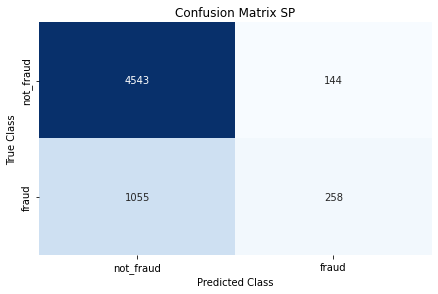

In [ ]:
matrix_sp = confusion_matrix(y_test, y_pred_sp)
cm_sp = pd.DataFrame(matrix_sp, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_sp, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SP"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

**---> Using Multi Layer Perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier
# model2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=2)
# model2 = MLPClassifier(solver='sgd', hidden_layer_sizes=(100,100), random_state=2)
# model2 = MLPClassifier(solver='adam', hidden_layer_sizes=(100,100), random_state=2)
# mlp = model2.fit(X_train, y_train)
# y_pred_mlp = model2.predict(X_test)

*  Hyper Parameter Tuning for MLP

In [ ]:
# mlp_max_iters = [200, 225, 250, 275]
mlp_max_iters = [1, 200]
# learning_rate = [0.001, 0.002, 0.003, 0.004]
mlp_learning_rate = [0.002, 0.001]
# tolerance = [0.0001, 0.0002, 0.0003, 0.0004]
mlp_tolerance = [0.0002, 0.0001]
final_model_mlp = MLPClassifier(solver='sgd', hidden_layer_sizes=(100), activation='logistic', random_state=2)
acc = -1
for iter in mlp_max_iters:
  for lr in mlp_learning_rate:
    for rho in mlp_tolerance:
      model3 = MLPClassifier(solver='sgd', hidden_layer_sizes=(100), activation='logistic', random_state=2, learning_rate_init=(lr), tol=(rho), max_iter=int(iter))
      model3.fit(X_train, np.array(y_train))
      mlp_y_pred_val = model3.predict(X_val)
      if metrics.accuracy_score(y_val, mlp_y_pred_val) > acc:
        acc = metrics.accuracy_score(y_val, mlp_y_pred_val)
        final_model_mlp = model3
        # print(acc)
final_model_mlp

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.002, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# mlp = model2.fit(X_train, y_train)
KFold_func(final_model_mlp, 'Multi Layer Perceptron')
y_pred_mlp = final_model_mlp.predict(X_test)

Multi Layer Perceptron: 0.783646 (0.006955)


In [ ]:
print("Accuracy MLP:",metrics.accuracy_score(y_test, y_pred_mlp))
print("Precision MLP:",metrics.precision_score(y_test, y_pred_mlp, pos_label="0"))
print("Recall MLP:",metrics.recall_score(y_test, y_pred_mlp, pos_label="0"))
print("F1 Score MLP:",metrics.f1_score(y_test, y_pred_mlp, pos_label="0"))

Accuracy MLP: 0.7943333333333333
Precision MLP: 0.7975185249009134
Recall MLP: 0.987411990612332
F1 Score MLP: 0.8823641563393708


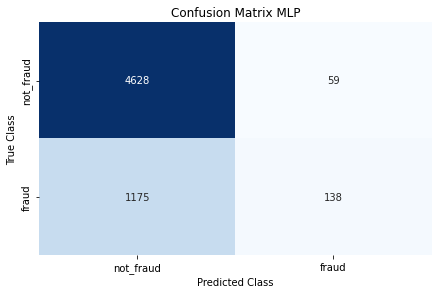

In [ ]:
matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_mlp = pd.DataFrame(matrix_mlp, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_mlp, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix MLP"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()